In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Summary

This is an NLP problem. This dataset uses tweets gathered about the coronavirus pandemic that are classified as either extremely negative, negative, neutral, positive, or extremely positive. The original data has information including the date and location of the original tweet as well as the username, but this information isn't important for creating a classifier. When creating the features and the classifiers, the feature is the original tweet and the classifier is the sentiment. 

The features will be exapanded once a bag of words model is created, where the number of features will become the number of unique words, which will be a great many number of features. These features will eventually need to be dimentionally reduced using PCA in order to create a computationally efficent model.

### Benchmarking Other Solutions

The first model I looked at use MLP Classifier. This model ran with 81% accuracy. While preprocessing the data, they mapped the sentiments to numerical values. They then cleaned the text of the tweets, by removing urls, html tags, digits, and hashtags. They first created a bag of words model. Then they used a neural network called MLP Classifier - Multi-layer Perceptron classifier. It relies on an underlying Neural Network to classify. Another model also used the MLP Classifier. This model also ran with 81% accuracy. They first cleaned the tweets to remove the links, usernames, hashtags, and audio/video tags.

The next model I look at compared different types of neural networks. First, they convert the sentiment labels to numerical labels. Then they embed the data, which turns the positive integers into dense vectors. First, they use Gated recurrent units (GRUs), which are a type of neural network. It performs with 40.75% accuracy. Then, they use bidirectional LSTM, which uses two models. It performs with even less accuracy at 38.9% accuracy. Then they use Bidirectional GRU, which performs with similar accuracy at 39.28%. Then they use convolutional neural networks, which performs with 38% accuracy. 

The next model I looked at used naive bayes. First, again, they clean the tweets. First they remove stop words and correct spelling errors. Then, they convert to lowercase and remove mentions and tags. They use the naive bayes classifier which produces an accuracy of 73.4%. 

| Model              | Accuracy |
|--------------------|----------|
| MLP Classifier     | 81%      |
| Naive Bayes        | 73.4%    |
| GRU                | 40.75%   |
| Bidirectional GRU  | 39.28%   |
| Bidirectional LSTM | 38.9%    |
| Convolutional NN   | 38%      |

All of the models used the same features, with slight differences depending on how they cleaned the text. Some models mapped the sentiments to numerical values and some didn’t. I think this depended on what kind of model they were using. I think the MLP Classifier is the most successful because of the neural network model it uses. However, the Naive Bayes model also performs with similar accuracy. I think I will try both and see which performs better. Something that I would like to take away from all of these models is the way that they pre-processed the text, including removing stop words and fixing spelling mistakes. 


### Data description and Initial Processing

First, I read in the data, which comes as two csv, one testing and one training. They are shown below. 

In [21]:
import pandas as pd

test = pd.read_csv("Corona_NLP_test.csv")
train = pd.read_csv("Corona_NLP_train.csv",encoding='latin1')

In [22]:
test.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [23]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [24]:
print("Shape of testing data:", test.shape, "\nShape of training data:" ,train.shape)

Shape of testing data: (3798, 6) 
Shape of training data: (41157, 6)


#### Exploratory Data Analysis

The following graphs show various insights about the data.

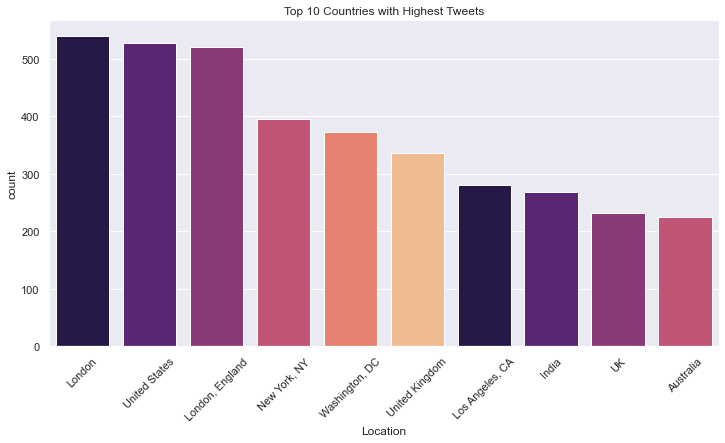

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)

#Top 10 Countries that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with Highest Tweets')
countries =sns.countplot(x='Location', data=train, order=train['Location'].value_counts().index[:10], palette = palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

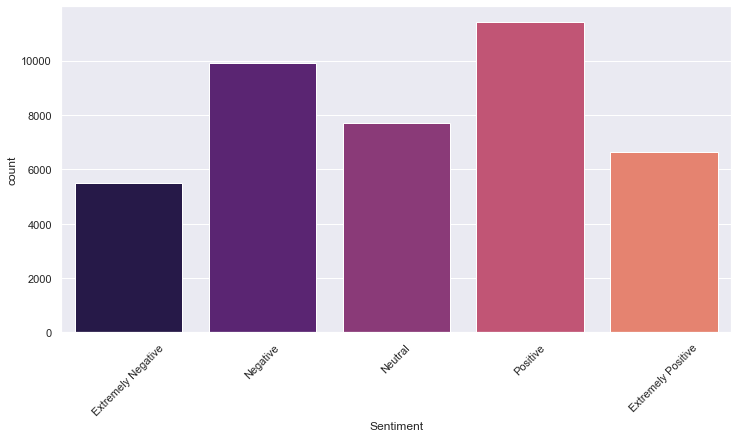

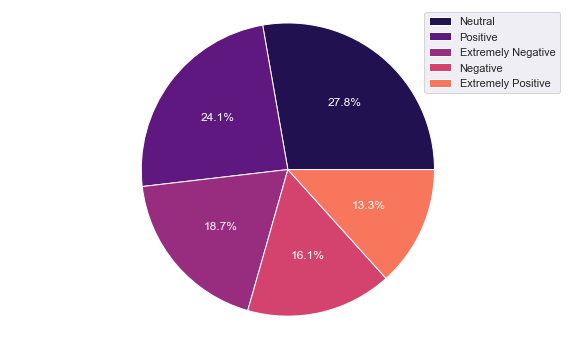

In [26]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(12,6))
sentiments =sns.countplot(x='Sentiment', data=train, order = ["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"], palette = palette)
sentiments.set_xticklabels(sentiments.get_xticklabels(), rotation=45)
plt.show() 

plt.figure(figsize=(10,6))
plt.pie(train['Sentiment'].value_counts(), labels=train['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Then the features and classifers are separated. Then, after separating the tweets into individual words and the stop words are removed, the ten most common words are found.

In [27]:
X_test = test['OriginalTweet']
X_train = train['OriginalTweet']
y_test = test['Sentiment']
y_train = train['Sentiment']

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#nltk.download('stopwords')
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

words = []
words_en = []
words_neg = []
words_n = []
words_p = []
words_ep = []

labels = []
for i in range(0, len(X_test)):
    w = X_test[i].split()
    for word in w:
        if word not in all_stopwords:
            words.append(word)
            if y_test[i] == "Extremely Negative":
                words_en.append(word)
            if y_test[i] == "Negative":
                words_neg.append(word)
            if y_test[i] == "Neutral":
                words_n.append(word)
            if y_test[i] == "Positive":
                words_p.append(word)
            if y_test[i] == "Extremely Positive":
                words_ep.append(word)


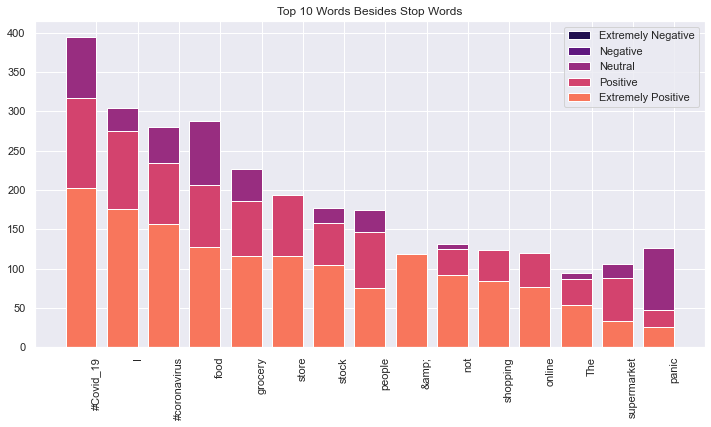

In [55]:
from collections import Counter
import numpy as np
counts = Counter(words)
labels, values = zip(*counts.most_common(15))
indexes = np.arange(len(labels))
width = 0.75


counts_en = Counter(words_en)
values_en = [counts_en[x] for x in labels]

counts_neg = Counter(words_neg)
values_neg = [counts_neg[x] for x in labels]

counts_n = Counter(words_n)
values_n = [counts_neg[x] for x in labels]

counts_p = Counter(words_p)
values_p = [counts_p[x] for x in labels]

counts_ep = Counter(words_ep)
values_ep = [counts_ep[x] for x in labels]

#Top 10 Most Common Words Besides Stop Words
plt.figure(figsize=(12,6))
plt.title('Top 10 Words Besides Stop Words')
#plt.bar(indexes, values, width)
plt.bar(indexes, values_en, width)
plt.bar(indexes, values_neg, width)
plt.bar(indexes, values_n, width)
plt.bar(indexes, values_p, width)
plt.bar(indexes, values_ep, width)
plt.xticks(indexes + width * 0.5, labels, rotation = 90)
plt.legend(['Extremely Negative', 'Negative', "Neutral", "Positive", "Extremely Positive"])
plt.show() 

Jumping ahead a little early, next we clean the data and create our bag of words and matrix. While cleaning the tweets, I remove urls, html tags, digits, hastags, usernames, and more. I also remove stopwords.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

corpus = []
for eachreview in X_test:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#\w+',' ', tw3) #removetags
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    r = re.sub('[^a-zA-Z]', ' ', tw8)
    r = r.lower()
    r = r.split()
    ps = PorterStemmer()
    #remove stopwords
    r = [ps.stem(word) for word in r if word not in all_stopwords]
    r = ' '.join(r)
    corpus.append(r)
for eachreview in X_train:
    tw1= re.sub(r'http\S+', ' ', eachreview) #remove urls
    tw2 = re.sub(r'<.*?>',' ', tw1) #remove html tags
    tw3 = re.sub(r'\d+',' ', tw2) #remove digits
    tw4 = re.sub(r'#\w+',' ', tw3) #removetags
    tw5 = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw4) #remove users
    tw6 = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tw5) #remove users
    tw7 = re.sub('VIDEO:', '', tw6)#removes video tag
    tw8 = tweet = re.sub('AUDIO:', '', tw7) #removes audio tag
    r = re.sub('[^a-zA-Z]', ' ', tw8)
    r = r.lower()
    r = r.split()
    ps = PorterStemmer()
    #remove stopwords
    r = [ps.stem(word) for word in r if word not in all_stopwords]
    r = ' '.join(r)
    corpus.append(r)
    
vecs = TfidfVectorizer()
newX = vecs.fit_transform(corpus)
m = newX.todense()

NameError: name 'X_test' is not defined

In [12]:
print("The length of our new matrix is:", len(vecs.get_feature_names()))

The length of our new matrix is: 23723


#### Sources:

https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
https://www.kaggle.com/code/hosamwajeeh/corona-virus-tweets-classification-nlp-nltk-81
https://www.kaggle.com/code/maricinnamon/coronavirus-tweets-classification-nlp-gru
https://www.kaggle.com/code/aravindanr22052001/corona-tweet-classification-81
https://www.kaggle.com/code/soumyacs/sentiment-analysis-naive-bayes